# Session 3: Further Pandas

#### 1. NYC buildings - Load and inspect a noisy dataset
We are using the PLUTO (Primary Land Use Tax Lot Output) database, which lists every building in New York City.
Source is [NYC Open Data Portal](https://www1.nyc.gov/site/planning/data-maps/open-data/dwn-pluto-mappluto.page). Check the [data dictionary](https://www1.nyc.gov/assets/planning/download/pdf/data-maps/open-data/pluto_datadictionary.pdf?r=18v2beta).

In [4]:
import numpy as np
import pandas as pd
import pylab as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/nicholasjones/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [5]:
# Create a dataframe using read_csv()

url = 'https://github.com/worldbank/Python-for-Data-Science/raw/master/Spring%202019%208-week%20course/week%203/pluto_shorter.csv'

df = pd.read_csv(url)

/Users/nicholasjones/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (18,19,21,23,78) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
# how big is it?

df.shape    # bonus: can you print 'loaded dataset with x rows and y columns'?

(42950, 97)

In [7]:
# inspect with .head()

df.head()

,Unnamed: 0,borough,block,lot,cd,ct2010,cb2010,schooldist,council,zipcode,...,firm07_flag,pfirm15_flag,rpaddate,dcasdate,zoningdate,landmkdate,basempdate,masdate,polidate,edesigdate
0,0,BX,5641.0,670.0,210.0,516.00,2.0,NaN,13.0,NaN,...,1.0,1.0,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
1,20,QN,4671.0,39.0,407.0,1039.00,2011.0,25.0,19.0,11357.0,...,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
2,40,BK,3925.0,32.0,305.0,1172.02,2004.0,19.0,37.0,11208.0,...,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
3,60,MN,1836.0,19.0,107.0,189.00,2002.0,3.0,7.0,10025.0,...,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
4,80,QN,8898.0,16.0,409.0,4.00,2001.0,27.0,30.0,11421.0,...,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018


#### 2. Clean up the dataset
Also known as 'data munging'

In [8]:
# List the columns

df.columns

Index(['Unnamed: 0', 'borough', 'block', 'lot', 'cd', 'ct2010', 'cb2010',
       'schooldist', 'council', 'zipcode', 'firecomp', 'policeprct',
       'healtharea', 'sanitboro', 'sanitsub', 'address', 'zonedist1',
       'zonedist2', 'zonedist3', 'zonedist4', 'overlay1', 'overlay2',
       'spdist1', 'spdist2', 'spdist3', 'ltdheight', 'splitzone', 'bldgclass',
       'landuse', 'easements', 'ownertype', 'ownername', 'lotarea', 'bldgarea',
       'comarea', 'resarea', 'officearea', 'retailarea', 'garagearea',
       'strgearea', 'factryarea', 'otherarea', 'areasource', 'numbldgs',
       'numfloors', 'unitsres', 'unitstotal', 'lotfront', 'lotdepth',
       'bldgfront', 'bldgdepth', 'ext', 'proxcode', 'irrlotcode', 'lottype',
       'bsmtcode', 'assessland', 'assesstot', 'exemptland', 'exempttot',
       'yearbuilt', 'yearalter1', 'yearalter2', 'histdist', 'landmark',
       'builtfar', 'residfar', 'commfar', 'facilfar', 'borocode', 'bbl',
       'condono', 'tract2010', 'xcoord', 'ycoord'

In [9]:
# make a list of desired columns; discard the rest.

my_cols = ['borough','numfloors','yearbuilt', 'landuse', 'zipcode', 'unitstotal', 'assesstot','policeprct']
df = df[my_cols]

In [10]:
# isnull() checks for missing values

df.borough.isnull()

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
42920    False
42921    False
42922    False
42923    False
42924    False
42925    False
42926    False
42927    False
42928    False
42929    False
42930    False
42931    False
42932    False
42933    False
42934    False
42935    False
42936    False
42937    False
42938    False
42939    False
42940    False
42941    False
42942    False
42943    False
42944    False
42945    False
42946    False
42947    False
42948    False
42949    False
Name: borough, Length: 42950, dtype: bool

In [11]:
# what data structure would be helpful to rename columns? (think 'old_name' : 'new_name')

df.rename(columns = {'zipcode': 'zip', 'yearbuilt': 'year_built', 'unitstotal': 'housing_units', 'assesstotal': 'assessed_value_USD'},
         inplace = True)

In [12]:
# each Series has a data type

In [13]:
df.dtypes

borough           object
numfloors        float64
year_built       float64
landuse          float64
zip              float64
housing_units    float64
assesstot        float64
policeprct       float64
dtype: object

Memo: `police_precint` would be better as an int.

### 3. Exploratory visualization
Pandas allows quick, iterative plotting to explore the properties of your data - helpful to diagnose data quality issues.

A histogram plots the frequency of each unique value. Let's plot one for year_built. Any problem?

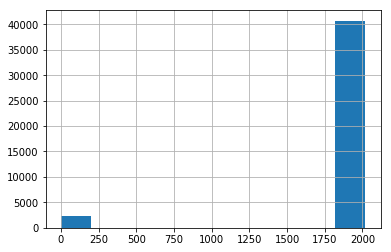

In [14]:
# .hist() plots a histogram for all values in a Series.

df.year_built.hist()

In [15]:
# pause to get help on the .hist() method

df.hist?

Signature:
df.hist(
    column=None,
    by=None,
    grid=True,
    xlabelsize=None,
    xrot=None,
    ylabelsize=None,
    yrot=None,
    ax=None,
    sharex=False,
    sharey=False,
    figsize=None,
    layout=None,
    bins=10,
    **kwds,
)
Docstring:
Make a histogram of the DataFrame's.

A `histogram`_ is a representation of the distribution of data.
This function calls :meth:`matplotlib.pyplot.hist`, on each series in
the DataFrame, resulting in one histogram per column.

.. _histogram: https://en.wikipedia.org/wiki/Histogram

Parameters
----------
data : DataFrame
    The pandas object holding the data.
column : string or sequence
    If passed, will be used to limit data to a subset of columns.
by : object, optional
    If passed, then used to form histograms for separate groups.
grid : boolean, default True
    Whether to show axis grid lines.
xlabelsize : int, default None
    If specified changes the x-axis label size.
xrot : float, default None
    Rotation of x axis lab

In [16]:
# Presumably few NYC buildings were constructed during the early days of the Roman Empire.
# Set year_built to np.nan for such values.

df.year_built[df.year_built < 1000] = np.nan

/Users/nicholasjones/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


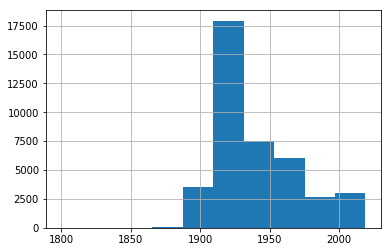

In [17]:
# histogram should make sense without the erroneous values

df.year_built.hist()

#### 4. Handle missing values
How many missing values?

In [18]:
# isnull() evaluates each item, returning True if NaN and False otherwise

df.isnull().sum()

borough             0
numfloors          30
year_built       2244
landuse           134
zip              1050
housing_units      20
assesstot          20
policeprct         73
dtype: int64

 What steps to take, eg:
* drop rows with missing values
* deduce the missing values (eg. ZIP from coordinates)
* fill NaNs using mean, median or a custom strategy

In [19]:
# find methods to address missing values


In [20]:
# check how a method works and what parameters it needs

df.fillna?


Signature:
df.fillna(
    value=None,
    method=None,
    axis=None,
    inplace=False,
    limit=None,
    downcast=None,
    **kwargs,
)
Docstring:
Fill NA/NaN values using the specified method.

Parameters
----------
value : scalar, dict, Series, or DataFrame
    Value to use to fill holes (e.g. 0), alternately a
    dict/Series/DataFrame of values specifying which value to use for
    each index (for a Series) or column (for a DataFrame). (values not
    in the dict/Series/DataFrame will not be filled). This value cannot
    be a list.
method : {'backfill', 'bfill', 'pad', 'ffill', None}, default None
    Method to use for filling holes in reindexed Series
    pad / ffill: propagate last valid observation forward to next valid
    backfill / bfill: use NEXT valid observation to fill gap
axis : {0 or 'index', 1 or 'columns'}
inplace : boolean, default False
    If True, fill in place. Note: this will modify any
    other views on this object, (e.g. a no-copy slice for a column in a

In [21]:
# For now, drop all rows with NaNs

print('original shape: ', df.shape)

df.dropna(inplace=True)

print('new shape: ', df.shape)

original shape:  (42950, 8)
new shape:  (40644, 8)


#### 5. Compute summary statistics

In [22]:
# Use methods like max, min and mean() on a column

print("Max floors: ", df.numfloors.max())
print("Mean assessed value: {:.0f}".format(df.assesstot.mean()))

Max floors:  58.0
Mean assessed value: 441861


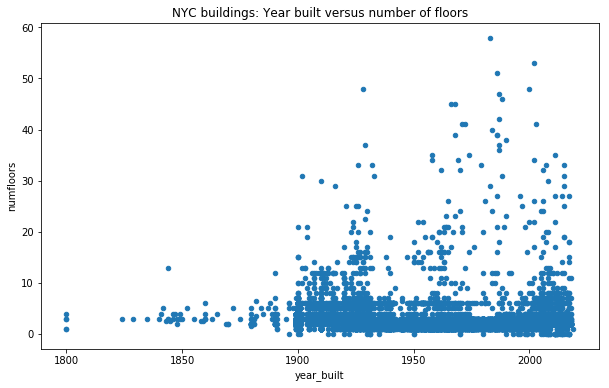

In [23]:
# Use plotting to explore relationships in the data

df.plot(x = 'year_built', y = 'numfloors', kind = 'scatter', title = 'NYC buildings: Year built versus number of floors',figsize = (10,6));

## Second example - unemployment data
*Objectives: Merge datasets, fill missing data through interpolation, use time series*

In [24]:
# Load a dataset of Eurostat unemployment data 

unemployment = pd.read_csv('https://raw.githubusercontent.com/worldbank/Python-for-Data-Science/master/Spring%202019%208-week%20course/week%205/data/country_total.csv')

In [25]:
# Inspect with the .head() method

unemployment.head()

,country,seasonality,month,unemployment,unemployment_rate
0,at,nsa,1993.01,171000,4.5
1,at,nsa,1993.02,175000,4.6
2,at,nsa,1993.03,166000,4.4
3,at,nsa,1993.04,157000,4.1
4,at,nsa,1993.05,147000,3.9


In [26]:
# the .shape attribute gives a tuple with row and column numbers

unemployment.shape

(20796, 5)

You may notice that the month column actually shows the year and month. Let's rename it.

In [27]:
# Pass a dictionary to the .rename() method, specifying the column to rename (the dictionary key) and the new name to use (the dictionary value).

unemployment.rename(columns = {'month': 'year_month'}, inplace = True)

**Data munging**

This column is not easy to work with:

In [28]:
unemployment['year_month'].head()

0    1993.01
1    1993.02
2    1993.03
3    1993.04
4    1993.05
Name: year_month, dtype: float64

Let's separate year and month into their own columns:

In [29]:
# Step by step: first make the column contain strings

unemployment.year_month = unemployment.year_month.astype(str)

In [30]:
# Let's check what an example cell looks like


In [ ]:
# What is this code structure called? Practice it as homework.

[string.split('.')[0] for string in unemployment.year_month][:5]

In [31]:
# Reassign to new column

unemployment['year'] = [string.split('.')[0] for string in unemployment.year_month]

In [32]:
unemployment['month'] = [string.split('.')[1] for string in unemployment.year_month]

It would be better to see the full names of the countries. Let's load another csv that has these.

In [33]:
countries_url = 'https://raw.githubusercontent.com/dlab-berkeley/introduction-to-pandas/master/data/countries.csv'
countries = pd.read_csv(countries_url)

In [34]:
countries.head()

,country,google_country_code,country_group,name_en,name_fr,name_de,latitude,longitude
0,at,AT,eu,Austria,Autriche,Österreich,47.696554,13.345980
1,be,BE,eu,Belgium,Belgique,Belgien,50.501045,4.476674
2,bg,BG,eu,Bulgaria,Bulgarie,Bulgarien,42.725674,25.482322
3,hr,HR,non-eu,Croatia,Croatie,Kroatien,44.746643,15.340844
4,cy,CY,eu,Cyprus,Chypre,Zypern,35.129141,33.428682


**Merging dataframes**

Now, let's merge the two dfs, to get full country name and country_group.

In [35]:
country_names = countries[['country','name_en','country_group']]

In [37]:
unemployment = pd.merge(unemployment, country_names, on='country')

Check the full [documentation](http://pandas.pydata.org/pandas-docs/stable/merging.html#database-style-dataframe-joining-merging) on merging.

**Value counts and sorting**

What's the state of unemployment data for these countries? Do some countries report more frequently?

In [ ]:
# these options mean not seasonally adjusted, seasonally adjusted, trend cycle

unemployment.seasonality.unique()

In [43]:
# .value_counts() return a Series containing unique values as its index and
# frequencies as its values, in descending order.

unemployment.name_en.value_counts().sort_values(ascending = True)[:15]

Turkey                                       210
Croatia                                      324
Estonia                                      387
Cyprus                                       396
Romania                                      423
Greece                                       450
Latvia                                       459
Lithuania                                    459
Czech Republic                               468
Germany (including  former GDR from 1991)    504
Bulgaria                                     576
Slovenia                                     576
Poland                                       576
Slovakia                                     576
Malta                                        576
Name: name_en, dtype: int64

In [ ]:
print("Dataset runs from {} to {}".format(unemployment.year.min(), unemployment.year.max()))

**View subsets of the data based on conditions**

You can subset the data using the syntax below.

For now, just learn and adapt this syntax. As homework, look up Boolean indexing in the McKinney book and see why this works.


In [44]:
unemployment[unemployment.name_en == 'Italy'].head(2)

,country,seasonality,year_month,unemployment,unemployment_rate,year,month,name_en,country_group
10197,it,nsa,1983.01,1592000,7.2,1983,01,Italy,eu
10198,it,nsa,1983.02,1629000,7.3,1983,02,Italy,eu


In [45]:
unemployment[unemployment.unemployment_rate < 10].head(2)

,country,seasonality,year_month,unemployment,unemployment_rate,year,month,name_en,country_group
0,at,nsa,1993.01,171000,4.5,1993,01,Austria,eu
1,at,nsa,1993.02,175000,4.6,1993,02,Austria,eu


#### Summarize values with `groupby()`
A `groupby()` operation carries out some combination of splitting the data, performing an operation, and combining the results:

* state the Series you want to group by.
* append the operation you want to perform such as .mean(), .sum() or .count()

In [60]:
unemployment.head(2)

,country,seasonality,year_month,unemployment,unemployment_rate,year,month,name_en,country_group
0,at,nsa,1993.01,171000,4.5,1993,01,Austria,eu
1,at,nsa,1993.02,175000,4.6,1993,02,Austria,eu


In [62]:
unemployment_small = unemployment[['unemployment_rate','name_en']]

unemployment_small.head()

,unemployment_rate,name_en
0,4.5,Austria
1,4.6,Austria
2,4.4,Austria
3,4.1,Austria
4,3.9,Austria


In [71]:
unemployment_small.groupby('name_en',sort=True).mean()

,unemployment_rate
name_en,
Austria,4.278549
Belgium,8.480853
Bulgaria,11.644444
Croatia,11.727778
Cyprus,4.608333
Czech Republic,7.235256
Denmark,6.012202
Estonia,9.979845
Finland,9.467391


In [ ]:
unemployment_small.groupby('name_en',sort=True).mean().sort_values(by = 'unemployment_rate', ascending=False)[:10]

**Drop or fill missing values**

It's not surprising that different statistical agencies collect unemployment stats at different frequencies. But to compare say Spain and Portugal, we may wish to fill the missing value gaps. Pandas has several options, a simple one being ffill (forward fill).

Let's look at two neighbors with high unemployment: Latvia and Lithuania

In [87]:
from dateutil.parser import parse

In [90]:
unemployment.head(2)

,country,seasonality,year_month,unemployment,unemployment_rate,year,month,name_en,country_group
0,at,nsa,1993:01,171000,4.5,1993,01,Austria,eu
1,at,nsa,1993:02,175000,4.6,1993,02,Austria,eu


#### Add a datetime index

In [89]:
# recombine the year and month columns

unemployment['year_month'] = unemployment['year'] + ":"+ unemployment['month']

In [96]:
# specify a format to parse datetimes, based on these: %d/%m/%Y”

unemployment['date_time'] = pd.to_datetime(unemployment.year_month, format='%Y:%m')

In [98]:
# make it the df's index

unemployment.set_index('date_time',drop=True, inplace = True)

In [105]:
start_date = parse('1995-01-01')
end_date = parse('2000-01-01')

In [107]:
unemployment[unemployment.index > start_date][:5]

,country,seasonality,year_month,unemployment,unemployment_rate,year,month,name_en,country_group
date_time,,,,,,,,,
1995-02-01,at,nsa,1995:02,174000,4.5,1995,02,Austria,eu
1995-03-01,at,nsa,1995:03,160000,4.2,1995,03,Austria,eu
1995-04-01,at,nsa,1995:04,150000,3.9,1995,04,Austria,eu
1995-05-01,at,nsa,1995:05,141000,3.7,1995,05,Austria,eu
1995-06-01,at,nsa,1995:06,129000,3.4,1995,06,Austria,eu


[Text(0.5, 1.0, 'Unemployment: Lithuania and Latvia')]

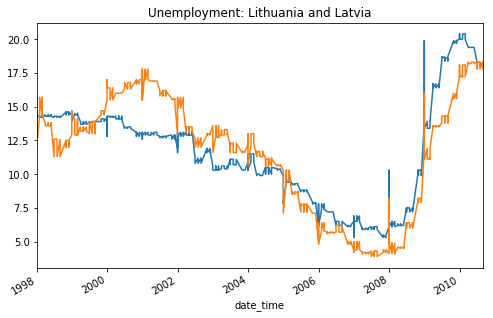

In [112]:
f,ax = plt.subplots(figsize = (8,5))

unemployment.unemployment_rate[unemployment.name_en == 'Latvia'].plot(ax = ax)
unemployment.unemployment_rate[unemployment.name_en == 'Lithuania'].plot(ax = ax)

ax.set(title="Unemployment: Lithuania and Latvia")